* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: import k-means algorithm to MNIST test data set
* github: https://github.com/mydream757/Computer_Vision

1. Import liabraries and define class

* import needed libraries and define the global variables

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
size_row = 28
size_col = 28

In [2]:
#normalize data
def normalize(data):
    normalized = (data - min(data)) / (max(data)-min(data))

    return normalized

#calculate distance
def distance(x,y):
    d = (x - y)**2
    s = np.sum(d)

    return s

* choose initial centroids from given data set.

In [3]:
#get initial centroids from data set
def chooseCentroid(list_image,list_label,numOfk):
    list_centroid =np.empty((size_row*size_col, numOfk), dtype=float)
    list_centroidLabel = np.empty(numOfk,dtype=int)

    rand_num = random.randint(0,len(list_label)-1)
    for i in range(numOfk):
        random.seed()
        while list_label[rand_num] in list_centroidLabel:
            rand_num = random.randint(0,len(list_label)-1)
        list_centroidLabel[i] = list_label[rand_num]
        list_centroid[:,i] = list_image[:,rand_num]

    return [list_centroid, list_centroidLabel]

* compute accuaracy when k = 10.

In [20]:
#when k=10, compute accuracy
def computeAccuracy(list_label,list_clabel):
    num = len(list_label)
    count = 0 
    for i in range(num):
        if list_label[i]==list_clabel[i]:
            count +=1

    accuracy = (count/num)*100
    return accuracy

* compute energy per iteration. $E = \sum_{k=1}^{K} \sum_{n=1}^{N}r_{nk}\Vert{X_n}-{c_k}\Vert^2$

In [5]:
def computeEnergy(list_image, list_centroid,list_clabel,list_centroidLabel):
    energy = 0
    for i in range(len(list_clabel)):
        for k in range(len(list_centroidLabel)):
            if list_clabel[i] == list_centroidLabel[k]:
                energy += distance(list_image[:,i],list_centroid[:,k])
    return energy

* change label on images's label list.

In [6]:
def assignLabel(list_image,list_clabel,list_centroid,list_centroidLabel):
    for i in range(len(list_clabel)):
        result = distance(list_image[:,i],list_centroid[:,0])
        list_clabel[i] = list_centroidLabel[0]
        for k in range(len(list_centroidLabel)):
            tmp = distance(list_image[:,i],list_centroid[:,k])
            if result > tmp:
                result = tmp
                list_clabel[i] = list_centroidLabel[k]

* this is used for checking the loop condition

In [7]:
def makeLabelList(list_clabel):
    list = np.empty(len(list_clabel),dtype=int)
    for i in range(len(list_clabel)):
        list[i] = list_clabel[i]
    return list

* compute and return the centroids.

In [8]:
def computeCentroid(list_image,list_clabel,list_centroidLabel):
    im_average  = np.zeros((size_row * size_col, len(list_clabel)), dtype=float)
    im_count    = np.zeros(len(list_clabel), dtype=int)

    for i in range(len(list_clabel)):
        for k in range(len(list_centroidLabel)):
            if list_clabel[i] == list_centroidLabel[k]:
                im_average[:, k] += list_image[:, i]
                im_count[k] += 1

    for i in range(len(list_centroidLabel)):
        im_average[:, i] /= im_count[i]

    return im_average

* check the loop condition by label lists.

In [9]:
def conditionCheck(before_label,after_label):
    for i in range(len(before_label)):
        if before_label[i] != after_label[i]:
            return True
    return False

2. Main function of K-means algorithm.

* this is the main function of k-means algorithm. 

In [22]:
# start of k = 2, end of k = 10
def k_means(k):
    count = 0
    
    #get data from .csv file
    file_data = "mnist_test.csv"
    handle_file = open(file_data, "r")
    data = handle_file.readlines()
    num_image = len(data)
    handle_file.close()
    #generate lists of image and (true) labels
    list_image  = np.empty((size_row * size_col, num_image), dtype=float)
    list_label  = np.empty(num_image, dtype=int)
    
    # split data into list
    for line in data:
        line_data = line.split(',')
        label = line_data[0]
        im_vector = np.asfarray(line_data[1:])
        im_vector = normalize(im_vector)

        list_label[count] = label
        list_image[:,count] = im_vector
        count += 1

    #generate list of centroid (clustering)label
    list_clabel = np.empty(num_image, dtype=int)
    #choose initial centroids and generate centroid label list
    list_centroid,list_centroidLabel = chooseCentroid(list_image,list_label,k)  
    
    #initial centroids show
    f1 = plt.figure()
    for i in range(k):

        label       = list_centroidLabel[i]
        im_vector   = list_centroid[:, i]
        im_matrix   = im_vector.reshape((size_row, size_col))   

        plt.subplot(1, 10, i+1)       
        plt.title(label)
        plt.imshow(im_matrix, cmap='Greys',interpolation='None')  

        frame   = plt.gca()             
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.show()
    #get label list for condition check
    before = makeLabelList(list_clabel)
    #assign labels
    assignLabel(list_image,list_clabel,list_centroid,list_centroidLabel)
    #get label list for condition check
    after = makeLabelList(list_clabel)
    
    iterCount = 0
    #if before list and after list is same, stop loop
    while conditionCheck(before,after)==True :
        #update before list
        before = after
        #compute new centroids from changed labels
        list_centroid = computeCentroid(list_image,list_clabel,list_centroidLabel)
        #by the new centroids, change the labels
        assignLabel(list_image,list_clabel,list_centroid,list_centroidLabel)
        after = makeLabelList(list_clabel)
        
        #compute energy at this iteration
        energy = computeEnergy(list_image, list_centroid,list_clabel,list_centroidLabel)
        iterCount += 1
        print("Iter: ",iterCount," & Energy: ",energy)

    im_average  = np.zeros((size_row * size_col, k), dtype=float)
    im_count    = np.zeros(k, dtype=int)

    f2 = plt.figure(2)
    for i in range(len(list_centroidLabel)):

        plt.subplot(1, 10, i+1)
        plt.title(list_centroidLabel[i])
        plt.imshow(list_centroid[:,i].reshape((size_row, size_col)), cmap='Greys')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.show()
    #if k=10, compute accuracy and show
    if k==10:
        accuracy = computeAccuracy(list_label,list_clabel)
        print("accuracy: ",accuracy)

3. Results

This program doesn't make centroids. this just choose random units from data set.

* the start of k is '2'

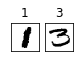

Iter:  1  & Energy:  498803.87242124154
Iter:  2  & Energy:  495760.2432725557
Iter:  3  & Energy:  494454.45303971885
Iter:  4  & Energy:  493809.8769836099
Iter:  5  & Energy:  493432.1199801324
Iter:  6  & Energy:  493241.46199379634
Iter:  7  & Energy:  493153.3454539614
Iter:  8  & Energy:  493121.1677338114
Iter:  9  & Energy:  493113.5369395657
Iter:  10  & Energy:  493108.2841998108
Iter:  11  & Energy:  493104.95829513005
Iter:  12  & Energy:  493103.94312557427
Iter:  13  & Energy:  493103.5465340409
Iter:  14  & Energy:  493103.2746975684
Iter:  15  & Energy:  493103.21124978334
Iter:  16  & Energy:  493103.18680798414


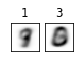

In [11]:
k_means(2)

The result is hard to recognize.

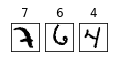

Iter:  1  & Energy:  485780.63758017117
Iter:  2  & Energy:  476037.1417951543
Iter:  3  & Energy:  472984.177666077
Iter:  4  & Energy:  472183.1075374662
Iter:  5  & Energy:  472023.83686686074
Iter:  6  & Energy:  471981.32366304693
Iter:  7  & Energy:  471968.27806577255
Iter:  8  & Energy:  471960.35407858784
Iter:  9  & Energy:  471952.9335702368
Iter:  10  & Energy:  471949.8696635349
Iter:  11  & Energy:  471948.8386487071
Iter:  12  & Energy:  471947.76788445236
Iter:  13  & Energy:  471946.37670752616
Iter:  14  & Energy:  471945.2041845023
Iter:  15  & Energy:  471944.7417612958
Iter:  16  & Energy:  471944.58707147324
Iter:  17  & Energy:  471944.2223717432
Iter:  18  & Energy:  471943.8715299087
Iter:  19  & Energy:  471943.73988533195
Iter:  20  & Energy:  471943.6994516185


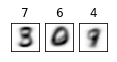

In [12]:
k_means(3)

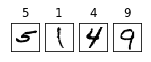

Iter:  1  & Energy:  481727.8392561482
Iter:  2  & Energy:  474239.33441937383
Iter:  3  & Energy:  469770.02642840584
Iter:  4  & Energy:  465593.0518069285
Iter:  5  & Energy:  461437.2003824289
Iter:  6  & Energy:  458400.50692892005
Iter:  7  & Energy:  456892.09847017436
Iter:  8  & Energy:  456129.94845004234
Iter:  9  & Energy:  455743.3761687409
Iter:  10  & Energy:  455539.64769744856
Iter:  11  & Energy:  455402.4680453792
Iter:  12  & Energy:  455317.279036559
Iter:  13  & Energy:  455252.1844353519
Iter:  14  & Energy:  455190.10174534033
Iter:  15  & Energy:  455118.8722669243
Iter:  16  & Energy:  455056.521989718
Iter:  17  & Energy:  454972.8694049361
Iter:  18  & Energy:  454888.629373247
Iter:  19  & Energy:  454759.9746287354
Iter:  20  & Energy:  454615.2415386454
Iter:  21  & Energy:  454406.7186908886
Iter:  22  & Energy:  454114.5546604468
Iter:  23  & Energy:  453764.08640630497
Iter:  24  & Energy:  453302.305393386
Iter:  25  & Energy:  452838.9025268404
Iter:

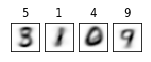

In [13]:
k_means(4)

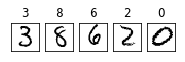

Iter:  1  & Energy:  453197.66078474117
Iter:  2  & Energy:  446265.7194169439
Iter:  3  & Energy:  444230.9073569672
Iter:  4  & Energy:  442612.07622038363
Iter:  5  & Energy:  440964.1153880761
Iter:  6  & Energy:  439470.88211030595
Iter:  7  & Energy:  438225.63015757146
Iter:  8  & Energy:  437337.75816643296
Iter:  9  & Energy:  436688.71033597447
Iter:  10  & Energy:  436159.9052618775
Iter:  11  & Energy:  435641.5394147954
Iter:  12  & Energy:  435117.39681533613
Iter:  13  & Energy:  434554.3283538235
Iter:  14  & Energy:  433944.0730698408
Iter:  15  & Energy:  433405.9377133465
Iter:  16  & Energy:  432954.21529475506
Iter:  17  & Energy:  432657.05978515156
Iter:  18  & Energy:  432466.818635154
Iter:  19  & Energy:  432355.9924399566
Iter:  20  & Energy:  432314.2142752114
Iter:  21  & Energy:  432299.2821100238
Iter:  22  & Energy:  432289.73754276754
Iter:  23  & Energy:  432286.6908574218
Iter:  24  & Energy:  432284.78904103744
Iter:  25  & Energy:  432284.0118664811

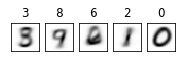

In [14]:
k_means(5)

Although k is much bigger than k=2, stil we can't tell that is good clustering.

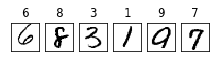

Iter:  1  & Energy:  431379.0122974147
Iter:  2  & Energy:  425618.6185393748
Iter:  3  & Energy:  424244.89724548993
Iter:  4  & Energy:  423752.48981145857
Iter:  5  & Energy:  423517.8109436064
Iter:  6  & Energy:  423355.26348031557
Iter:  7  & Energy:  423227.30034251814
Iter:  8  & Energy:  423139.8804074069
Iter:  9  & Energy:  423063.47435879736
Iter:  10  & Energy:  422984.41465285065
Iter:  11  & Energy:  422908.5174731895
Iter:  12  & Energy:  422848.50616584916
Iter:  13  & Energy:  422812.73647642514
Iter:  14  & Energy:  422774.52731582266
Iter:  15  & Energy:  422730.7907967787
Iter:  16  & Energy:  422687.99748942856
Iter:  17  & Energy:  422644.32777261286
Iter:  18  & Energy:  422591.2258305145
Iter:  19  & Energy:  422526.80158147076
Iter:  20  & Energy:  422441.04449438327
Iter:  21  & Energy:  422344.102608684
Iter:  22  & Energy:  422234.5377569585
Iter:  23  & Energy:  422089.3211384859
Iter:  24  & Energy:  421897.5099984761
Iter:  25  & Energy:  421676.31428844

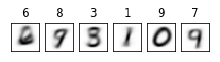

In [15]:
k_means(6)

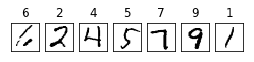

Iter:  1  & Energy:  441369.4732066819
Iter:  2  & Energy:  430590.95385029045
Iter:  3  & Energy:  426530.03753264964
Iter:  4  & Energy:  422787.3988567071
Iter:  5  & Energy:  419595.959160055
Iter:  6  & Energy:  418125.66564312205
Iter:  7  & Energy:  417519.337893581
Iter:  8  & Energy:  417034.1671827589
Iter:  9  & Energy:  416367.20244639757
Iter:  10  & Energy:  415390.3364617552
Iter:  11  & Energy:  413958.48226858664
Iter:  12  & Energy:  412729.41475541407
Iter:  13  & Energy:  412114.1458297913
Iter:  14  & Energy:  411776.4641795949
Iter:  15  & Energy:  411577.2932465257
Iter:  16  & Energy:  411466.02563373494
Iter:  17  & Energy:  411404.09125579963
Iter:  18  & Energy:  411366.4787701266
Iter:  19  & Energy:  411343.4035881605
Iter:  20  & Energy:  411318.1085922824
Iter:  21  & Energy:  411297.0132717604
Iter:  22  & Energy:  411282.90431939415
Iter:  23  & Energy:  411270.47103614983
Iter:  24  & Energy:  411259.43747556297
Iter:  25  & Energy:  411254.07458903955

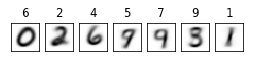

In [16]:
k_means(7)

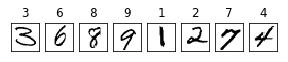

Iter:  1  & Energy:  435353.5136607683
Iter:  2  & Energy:  421416.73136179853
Iter:  3  & Energy:  416324.43984678737
Iter:  4  & Energy:  412889.85338557087
Iter:  5  & Energy:  411002.996657156
Iter:  6  & Energy:  410268.32103964617
Iter:  7  & Energy:  409870.9451822136
Iter:  8  & Energy:  409587.28157724295
Iter:  9  & Energy:  409360.3368975232
Iter:  10  & Energy:  409218.2293921035
Iter:  11  & Energy:  409100.65052645904
Iter:  12  & Energy:  409035.2407205957
Iter:  13  & Energy:  408971.99855951633
Iter:  14  & Energy:  408918.46616139886
Iter:  15  & Energy:  408885.6007815107
Iter:  16  & Energy:  408860.0990456538
Iter:  17  & Energy:  408847.8202893133
Iter:  18  & Energy:  408837.60913278285
Iter:  19  & Energy:  408825.7661663122
Iter:  20  & Energy:  408818.527654588
Iter:  21  & Energy:  408813.24382852565
Iter:  22  & Energy:  408807.88594092143
Iter:  23  & Energy:  408803.4774250088
Iter:  24  & Energy:  408801.58770126896
Iter:  25  & Energy:  408798.6367895905

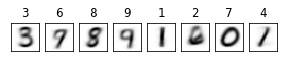

In [17]:
k_means(8)

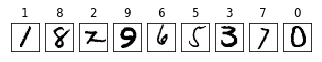

Iter:  1  & Energy:  435254.2938407262
Iter:  2  & Energy:  417567.3829882291
Iter:  3  & Energy:  409280.31659279566
Iter:  4  & Energy:  405133.3841348033
Iter:  5  & Energy:  402582.10386770434
Iter:  6  & Energy:  401026.6189378817
Iter:  7  & Energy:  400207.7963733028
Iter:  8  & Energy:  399795.9147393042
Iter:  9  & Energy:  399552.64746705664
Iter:  10  & Energy:  399416.3135800789
Iter:  11  & Energy:  399305.9142934744
Iter:  12  & Energy:  399189.1715944581
Iter:  13  & Energy:  399081.94865815906
Iter:  14  & Energy:  399006.2679102212
Iter:  15  & Energy:  398929.50741755246
Iter:  16  & Energy:  398849.4682366529
Iter:  17  & Energy:  398775.19058541243
Iter:  18  & Energy:  398677.2218882676
Iter:  19  & Energy:  398569.864685256
Iter:  20  & Energy:  398476.6827148266
Iter:  21  & Energy:  398430.6747422861
Iter:  22  & Energy:  398372.6808863982
Iter:  23  & Energy:  398325.86835893145
Iter:  24  & Energy:  398291.1620323096
Iter:  25  & Energy:  398248.310659186
Iter

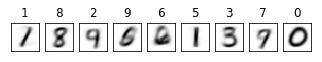

In [18]:
k_means(9)

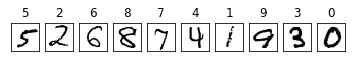

Iter:  1  & Energy:  414926.41958721884
Iter:  2  & Energy:  400704.1492578523
Iter:  3  & Energy:  396418.15073701565
Iter:  4  & Energy:  394834.9146623979
Iter:  5  & Energy:  394240.5191531714
Iter:  6  & Energy:  393958.30335304205
Iter:  7  & Energy:  393806.06708153273
Iter:  8  & Energy:  393702.1317819628
Iter:  9  & Energy:  393632.73039570544
Iter:  10  & Energy:  393561.69299367775
Iter:  11  & Energy:  393488.86455910874
Iter:  12  & Energy:  393405.0391005762
Iter:  13  & Energy:  393330.9303187796
Iter:  14  & Energy:  393254.3062498745
Iter:  15  & Energy:  393198.83931796224
Iter:  16  & Energy:  393168.174602458
Iter:  17  & Energy:  393142.0512975813
Iter:  18  & Energy:  393124.0924257433
Iter:  19  & Energy:  393113.11100499326
Iter:  20  & Energy:  393103.8578557945
Iter:  21  & Energy:  393092.3789304392
Iter:  22  & Energy:  393079.8420527198
Iter:  23  & Energy:  393069.14346800256
Iter:  24  & Energy:  393061.26345311996
Iter:  25  & Energy:  393055.2180335955

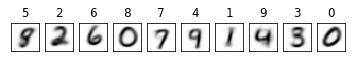

accuracy:  51.61


In [21]:
k_means(10)

More and more k, the final energy is lower. But the result is disappointing. About this result(accuracy is 51.61), I think that the initial value is important and recognizing image is very hard. Maybe I need some other solution for this.